In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\Stuart_bm\Stuart_bmcite_RNAassay_original.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata = sc.read_h5ad(dataset_dir / 'Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata.shape

(30672, 17009)

In [4]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [5]:
# Level1
labels_l1 = adata.obs['celltype.l1'].tolist()
types_l1 = np.unique(labels_l1).tolist()
types_l1

['B cell', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']

## Read annotation result from SingleR (Level 2)

In [6]:
pred_Hao_L2 = pd.read_csv('./result_Hao_ref/SingleR_pred_Stuart_ref_Hao_L2.csv', index_col=0)
pred_Hao_L2.head()

,scores.ASDC,scores.B.intermediate,scores.B.memory,scores.B.naive,scores.CD14.Mono,scores.CD16.Mono,scores.CD4.CTL,scores.CD4.Naive,scores.CD4.Proliferating,scores.CD4.TCM,...,scores.NK,scores.NK.Proliferating,scores.NK_CD56bright,scores.pDC,scores.Plasmablast,scores.Platelet,scores.Treg,labels,delta.next,pruned.labels
a_AAACCTGAGCTTATCG-1,0.459292,0.407229,0.418985,0.401615,0.379747,0.396831,0.408933,0.431814,0.502369,0.426214,...,0.390632,0.443803,0.404154,0.432074,0.452825,0.426729,0.428638,HSPC,0.137302,HSPC
a_AAACCTGAGGTGGGTT-1,0.369165,0.393194,0.398576,0.399674,0.357946,0.356994,0.425873,0.445233,0.393986,0.438979,...,0.401904,0.384356,0.401410,0.364266,0.358899,0.408695,0.445487,Treg,0.000084,Treg
a_AAACCTGAGTACATGA-1,0.371753,0.404587,0.409717,0.412163,0.361511,0.358636,0.430780,0.466125,0.407686,0.454279,...,0.402466,0.381705,0.413916,0.370317,0.390982,0.405023,0.467469,CD4 Naive,0.000908,CD4 Naive
a_AAACCTGCAAACCTAC-1,0.395562,0.427337,0.433462,0.432606,0.376741,0.383700,0.466586,0.484328,0.441781,0.482161,...,0.433417,0.417192,0.439496,0.381124,0.377115,0.455923,0.484143,Treg,0.000776,Treg
a_AAACCTGCAAGGTGTG-1,0.450925,0.389733,0.391916,0.393693,0.488242,0.468043,0.378524,0.380688,0.357318,0.380498,...,0.372399,0.353306,0.374524,0.400855,0.354458,0.469613,0.386908,CD14 Mono,0.070210,CD14 Mono


In [6]:
# NA in pruned.labels
pred_Hao_L2['pruned.labels'].isna().sum()

87

## Confusion matrix: Not converted (only reorder)

In [7]:
# Order for true cell types (from Stuart)
row_order = [
'Naive B',
'Memory B',
'CD4 Naive',
'CD4 Memory',
'CD8 Naive',
'CD8 Effector_1',
'CD8 Effector_2',
'CD8 Memory_1',
'CD8 Memory_2',
'gdT',
'Treg',
'MAIT',
'cDC2',
'pDC',
'CD14 Mono',
'CD16 Mono',
'NK',
'CD56 bright NK',
'Plasmablast',
'HSC',
'GMP',
'LMPP',
'Prog_RBC',
'Prog_B 1',
'Prog_B 2',
'Prog_DC',
'Prog_Mk',
]

# Order for predicted cell types (from Hao)
col_order = [
    'B naive',
    'B memory',
    'B intermediate',
    'CD4 Naive',
    'CD4 TCM',
    'CD4 TEM',
    'CD4 CTL',
    'CD4 Proliferating',
    'CD8 Naive',
    'CD8 TCM',
    'CD8 TEM',
    'CD8 Proliferating',
    'gdT',
    'Treg',
    'MAIT', 
    'dnT',
    'cDC1',
    'cDC2',
    'pDC',
    'ASDC',
    'CD14 Mono',
    'CD16 Mono',
    'NK',
    'NK_CD56bright',
    'NK Proliferating',
    'Plasmablast',
    'HSPC',
    'Doublet',
    'Eryth',
    'Platelet',
    'ILC'
]

In [8]:
true_labels = adata.obs['celltype.l2']
predicted_labels = pred_Hao_L2['labels']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['SingleR predicted'], margins=False)
cm = cm.loc[row_order, col_order]
cm

SingleR predicted,B naive,B memory,B intermediate,CD4 Naive,CD4 TCM,CD4 TEM,CD4 CTL,CD4 Proliferating,CD8 Naive,CD8 TCM,...,CD16 Mono,NK,NK_CD56bright,NK Proliferating,Plasmablast,HSPC,Doublet,Eryth,Platelet,ILC
True,,,,,,,,,,,,,,,,,,,,,
Naive B,1803,43,43,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Memory B,374,868,380,2,0,0,1,0,3,0,...,0,0,0,0,0,1,0,0,0,0
CD4 Naive,0,0,0,3407,10,2,0,1,648,0,...,0,0,0,0,0,1,0,1,0,1
CD4 Memory,0,0,0,574,1121,234,19,11,74,62,...,0,0,0,0,0,0,0,1,1,12
CD8 Naive,0,0,0,285,1,0,0,0,3557,7,...,0,0,0,0,0,0,0,0,0,0
CD8 Effector_1,0,0,0,5,0,0,198,0,18,5,...,0,8,4,0,0,0,0,1,0,0
CD8 Effector_2,2,1,0,0,0,0,8,0,10,4,...,0,0,0,0,0,0,0,2,0,0
CD8 Memory_1,0,0,0,15,3,10,22,0,93,105,...,0,0,0,0,0,0,0,1,0,2
CD8 Memory_2,0,0,0,2,5,5,255,0,12,13,...,0,5,0,0,0,0,0,2,0,0


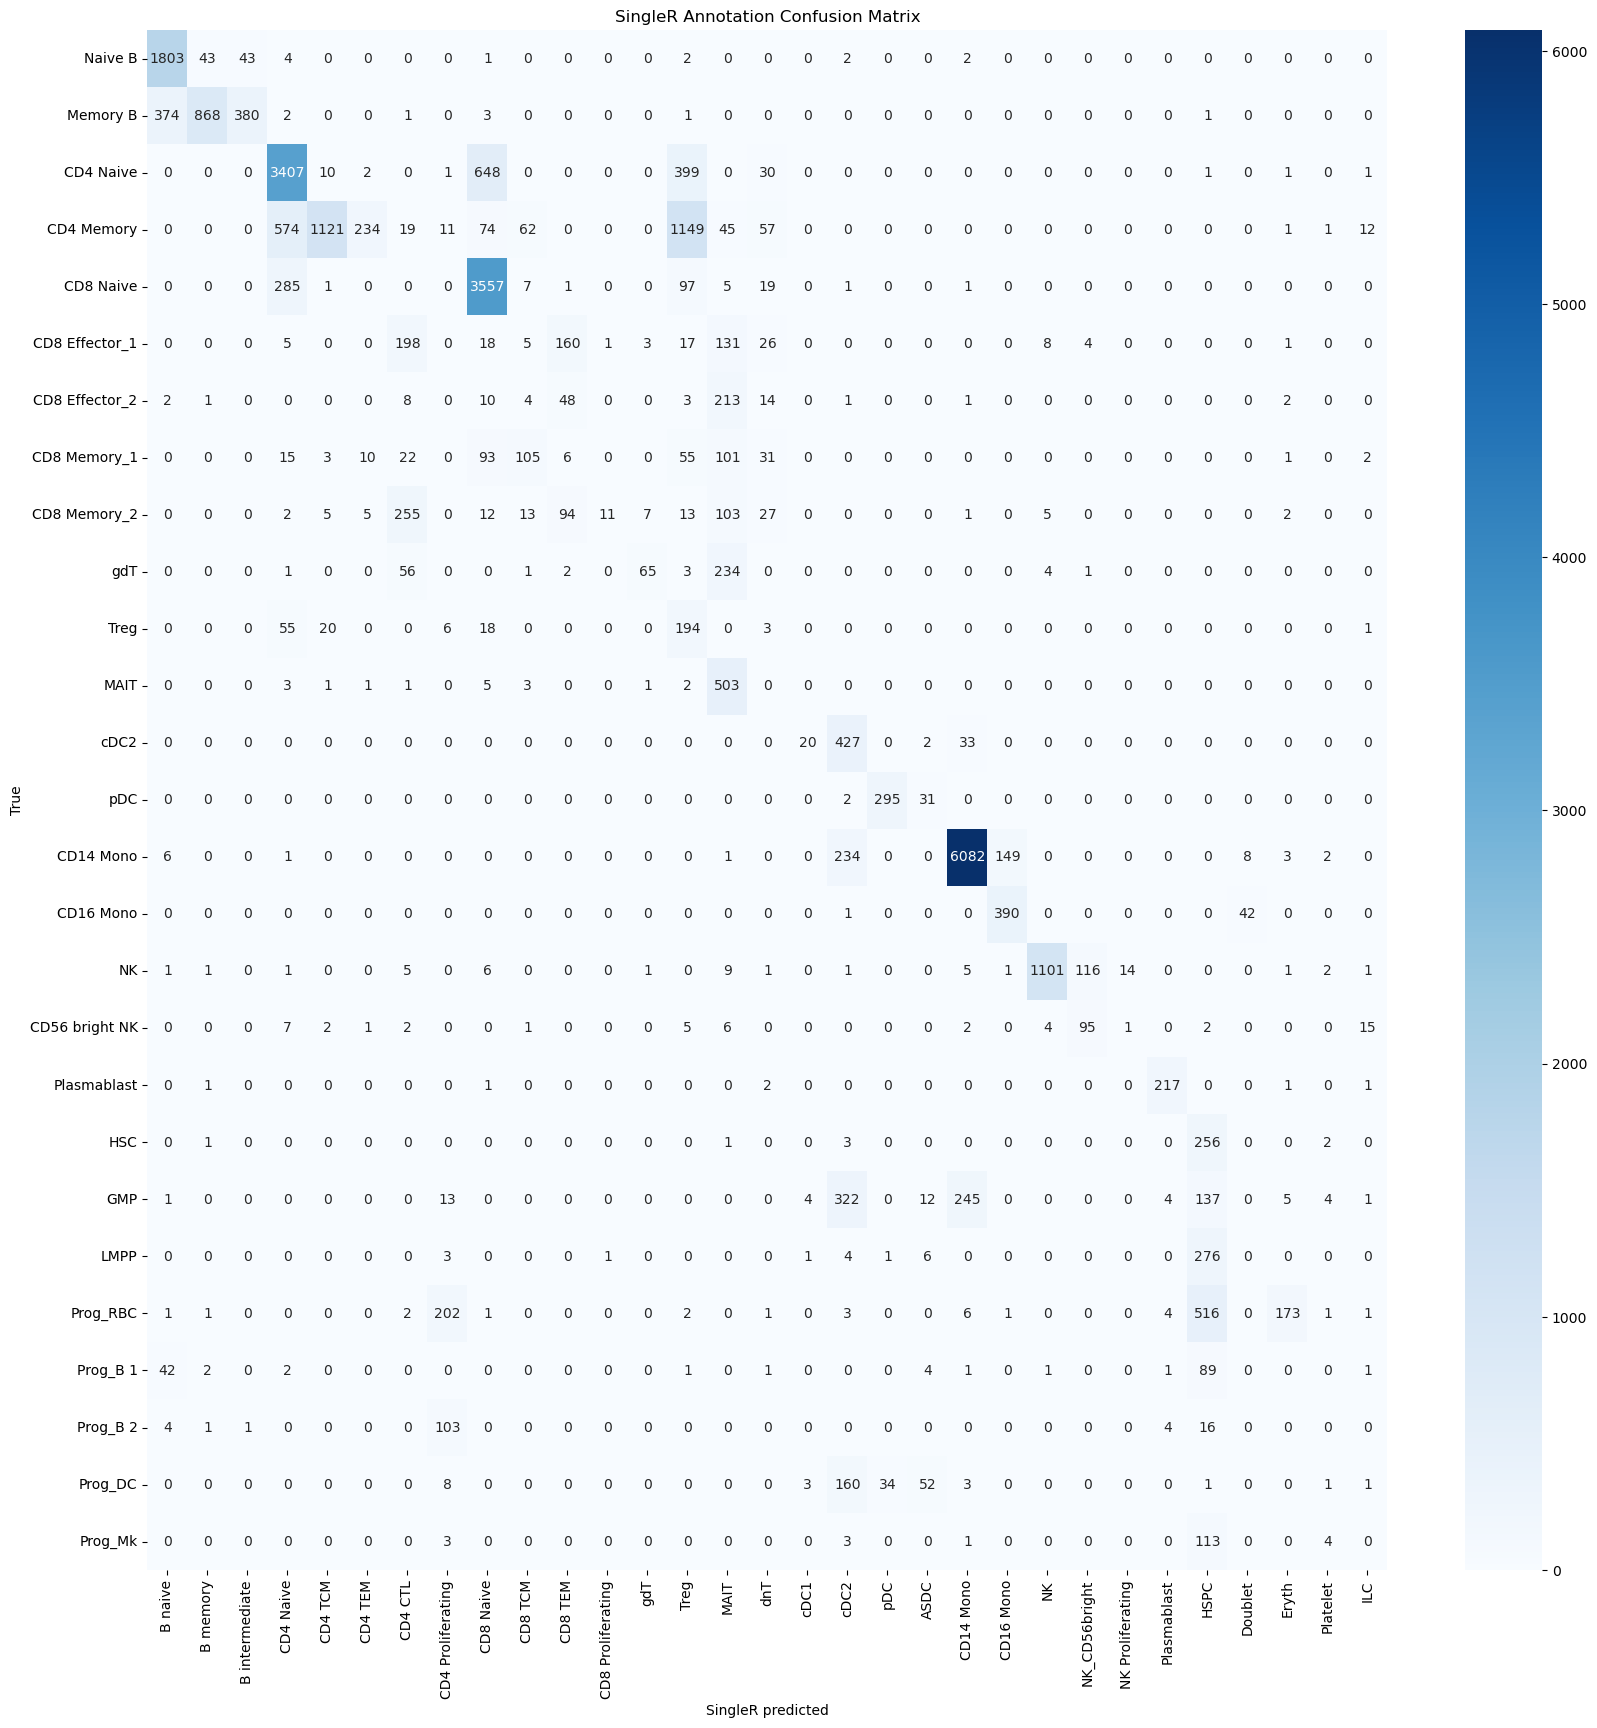

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

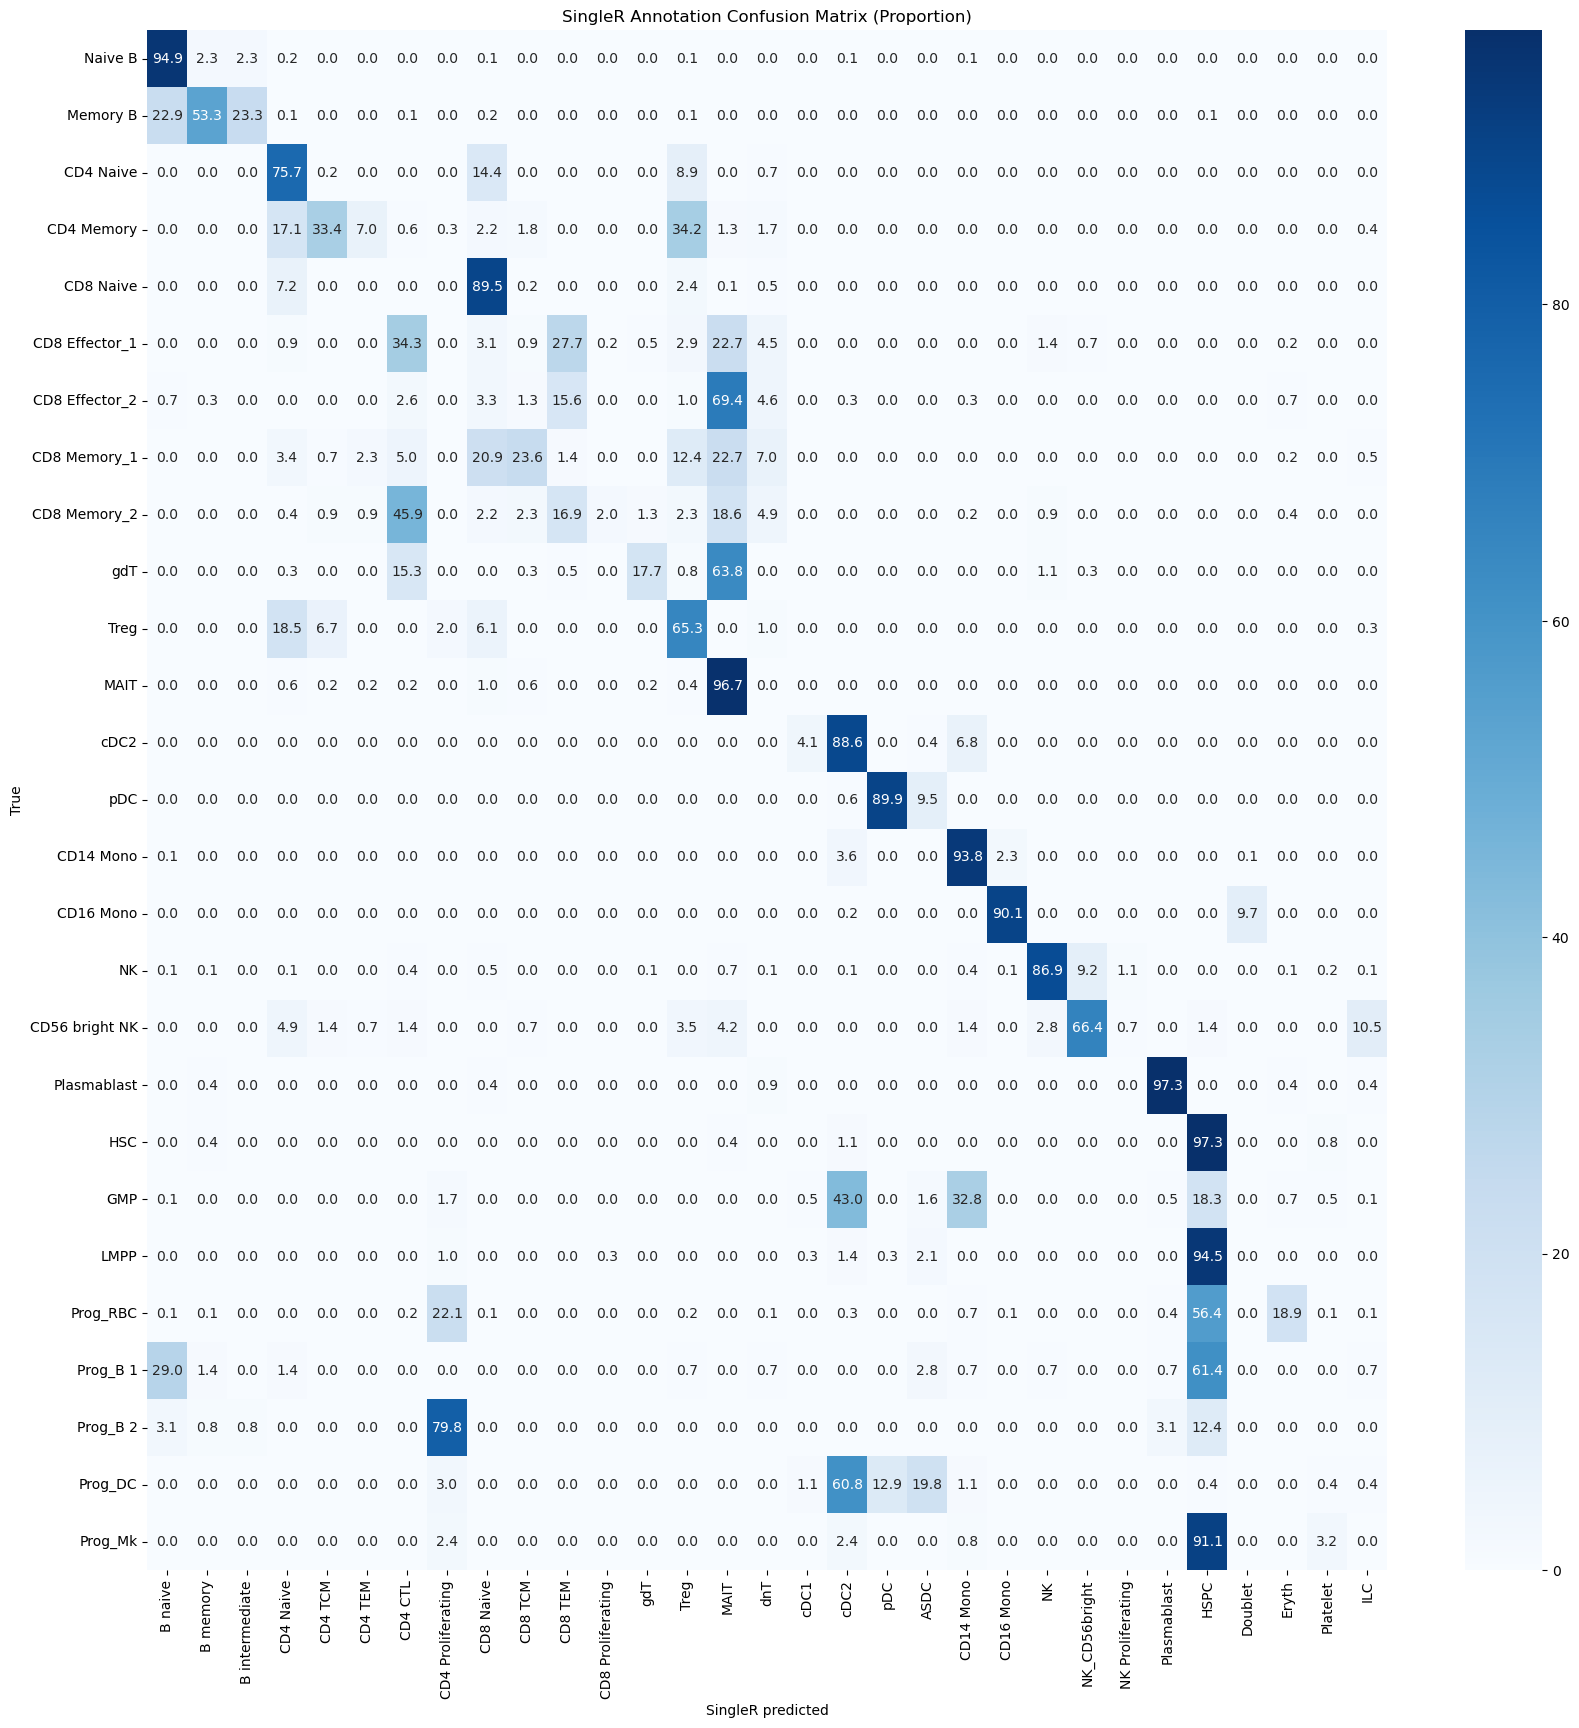

In [10]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(20, 20))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()

## Calculate accuracy manually

In [11]:
correct_count = (1803 + 868 + 3407 + 1121 + 234 + 3557 + 5 + 160 + 4 + 48 + 105 + 6 + 13 + 94 + 65 + 194 + 503 + 427 + 295 + 6082 + 
390 + 1101 + 95 + 217 + 256 + 137 + 276 + 516 + 89 + 16 + 1 + 113)  # 173 Prog_RBC predicted as Eryth
correct_count

22198

In [12]:
accuracy = correct_count / cm.sum().sum()
accuracy

0.7237219613980177

In [13]:
cm.sum().sum()

30672

## Map cell types

In [14]:
map_Stuart = {
    'Naive B': 'B naive',
    'Memory B': 'B memory',
    'CD4 Naive': 'CD4 Naive',
    # 'CD8 Effector_1': 'CD8 Memory',
    # 'CD8 Effector_2': 'CD8 Memory',
    # 'CD8 Memory_1': 'CD8 Memory',
    # 'CD8 Memory_2': 'CD8 Memory',
    'CD8 Effector_1': 'CD8 TEM',
    'CD8 Effector_2': 'CD8 TEM',
    'CD8 Memory_1': 'CD8 TCM',
    'CD8 Memory_2': 'CD8 TCM',
    'CD56 bright NK': 'NK_CD56bright',
    'cDC2': 'cDC', 
    'HSC': 'Progenitor cells',
    'GMP': 'Progenitor cells',
    'LMPP': 'Progenitor cells',
    'Prog_RBC': 'Progenitor cells',
    'Prog_B 1': 'Progenitor cells',
    'Prog_B 2': 'Progenitor cells',
    'Prog_DC': 'Progenitor cells',
    'Prog_Mk': 'Progenitor cells'
}

map_Hao = {
    'CD4 TCM': 'CD4 Memory',
    'CD4 TEM': 'CD4 Memory',
    # 'CD8 TCM': 'CD8 Memory',
    # 'CD8 TEM': 'CD8 Memory'
    'cDC1': 'cDC', 
    'cDC2': 'cDC',
    'HSPC': 'Progenitor cells'
}


In [15]:
# true_labels = adata.obs['celltype.l2']
# predicted_labels = pred_Hao_L2['labels']

for cell in pred_Hao_L2.index:
    if pred_Hao_L2.loc[cell, 'labels'] in map_Hao:
        pred_Hao_L2.loc[cell, 'converted_labels'] = map_Hao[pred_Hao_L2.loc[cell, 'labels']]
    else:
        pred_Hao_L2.loc[cell, 'converted_labels'] = pred_Hao_L2.loc[cell, 'labels']
pred_Hao_L2.head()

,scores.ASDC,scores.B.intermediate,scores.B.memory,scores.B.naive,scores.CD14.Mono,scores.CD16.Mono,scores.CD4.CTL,scores.CD4.Naive,scores.CD4.Proliferating,scores.CD4.TCM,...,scores.NK.Proliferating,scores.NK_CD56bright,scores.pDC,scores.Plasmablast,scores.Platelet,scores.Treg,labels,delta.next,pruned.labels,converted_labels
a_AAACCTGAGCTTATCG-1,0.459292,0.407229,0.418985,0.401615,0.379747,0.396831,0.408933,0.431814,0.502369,0.426214,...,0.443803,0.404154,0.432074,0.452825,0.426729,0.428638,HSPC,0.137302,HSPC,Progenitor cells
a_AAACCTGAGGTGGGTT-1,0.369165,0.393194,0.398576,0.399674,0.357946,0.356994,0.425873,0.445233,0.393986,0.438979,...,0.384356,0.401410,0.364266,0.358899,0.408695,0.445487,Treg,0.000084,Treg,Treg
a_AAACCTGAGTACATGA-1,0.371753,0.404587,0.409717,0.412163,0.361511,0.358636,0.430780,0.466125,0.407686,0.454279,...,0.381705,0.413916,0.370317,0.390982,0.405023,0.467469,CD4 Naive,0.000908,CD4 Naive,CD4 Naive
a_AAACCTGCAAACCTAC-1,0.395562,0.427337,0.433462,0.432606,0.376741,0.383700,0.466586,0.484328,0.441781,0.482161,...,0.417192,0.439496,0.381124,0.377115,0.455923,0.484143,Treg,0.000776,Treg,Treg
a_AAACCTGCAAGGTGTG-1,0.450925,0.389733,0.391916,0.393693,0.488242,0.468043,0.378524,0.380688,0.357318,0.380498,...,0.353306,0.374524,0.400855,0.354458,0.469613,0.386908,CD14 Mono,0.070210,CD14 Mono,CD14 Mono


In [16]:
for cell in adata.obs_names:
    if adata.obs.loc[cell, 'celltype.l2'] in map_Stuart:
        adata.obs.loc[cell, 'converted_true_l2'] = map_Stuart[adata.obs.loc[cell, 'celltype.l2']]
    else:
        adata.obs.loc[cell, 'converted_true_l2'] = adata.obs.loc[cell, 'celltype.l2']
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight,converted_true_l2
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701,Progenitor cells
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789,gdT
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714,CD4 Naive
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308,CD4 Memory
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508,CD14 Mono


In [17]:
true_labels = adata.obs['converted_true_l2']
predicted_labels = pred_Hao_L2['converted_labels']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['SingleR predicted'], margins=False)
# cm = cm.loc[row_order, col_order]
print(cm.index)
print(cm.columns)

Index(['B memory', 'B naive', 'CD14 Mono', 'CD16 Mono', 'CD4 Memory',
       'CD4 Naive', 'CD8 Naive', 'CD8 TCM', 'CD8 TEM', 'MAIT', 'NK',
       'NK_CD56bright', 'Plasmablast', 'Progenitor cells', 'Treg', 'cDC',
       'gdT', 'pDC'],
      dtype='object', name='True')
Index(['ASDC', 'B intermediate', 'B memory', 'B naive', 'CD14 Mono',
       'CD16 Mono', 'CD4 CTL', 'CD4 Memory', 'CD4 Naive', 'CD4 Proliferating',
       'CD8 Naive', 'CD8 Proliferating', 'CD8 TCM', 'CD8 TEM', 'Doublet',
       'Eryth', 'ILC', 'MAIT', 'NK', 'NK Proliferating', 'NK_CD56bright',
       'Plasmablast', 'Platelet', 'Progenitor cells', 'Treg', 'cDC', 'dnT',
       'gdT', 'pDC'],
      dtype='object', name='SingleR predicted')


In [18]:
row_order = ['B memory', 'B naive', 
             'CD4 Memory', 'CD4 Naive', 
             'CD8 Naive', 'CD8 TCM', 'CD8 TEM', 
             'MAIT', 'gdT', 'Treg', 
             'cDC', 'pDC', 
             'CD14 Mono', 'CD16 Mono', 
             'NK', 'NK_CD56bright', 
             'Plasmablast', 'Progenitor cells']
col_order = ['B memory', 'B naive', 'B intermediate', 
             'CD4 Memory', 'CD4 Naive', 'CD4 Proliferating', 'CD4 CTL', 
             'CD8 Naive', 'CD8 TCM', 'CD8 TEM', 'CD8 Proliferating', 
             'MAIT', 'gdT', 'Treg', 'dnT', 
             'cDC', 'pDC', 'ASDC', 
             'CD14 Mono', 'CD16 Mono', 
             'NK', 'NK_CD56bright', 'NK Proliferating', 
             'Plasmablast', 'Progenitor cells', 
             'ILC', 'Doublet', 'Eryth', 'Platelet']
cm = cm.reindex(row_order, axis=0)
cm = cm.reindex(col_order, axis=1)
cm

SingleR predicted,B memory,B naive,B intermediate,CD4 Memory,CD4 Naive,CD4 Proliferating,CD4 CTL,CD8 Naive,CD8 TCM,CD8 TEM,...,CD16 Mono,NK,NK_CD56bright,NK Proliferating,Plasmablast,Progenitor cells,ILC,Doublet,Eryth,Platelet
True,,,,,,,,,,,,,,,,,,,,,
B memory,868,374,380,0,2,0,1,3,0,0,...,0,0,0,0,0,1,0,0,0,0
B naive,43,1803,43,0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CD4 Memory,0,0,0,1355,574,11,19,74,62,0,...,0,0,0,0,0,0,12,0,1,1
CD4 Naive,0,0,0,12,3407,1,0,648,0,0,...,0,0,0,0,0,1,1,0,1,0
CD8 Naive,0,0,0,1,285,0,0,3557,7,1,...,0,0,0,0,0,0,0,0,0,0
CD8 TCM,0,0,0,23,17,0,277,105,118,100,...,0,5,0,0,0,0,2,0,3,0
CD8 TEM,1,2,0,0,5,0,206,28,9,208,...,0,8,4,0,0,0,0,0,3,0
MAIT,0,0,0,2,3,0,1,5,3,0,...,0,0,0,0,0,0,0,0,0,0
gdT,0,0,0,0,1,0,56,0,1,2,...,0,4,1,0,0,0,0,0,0,0


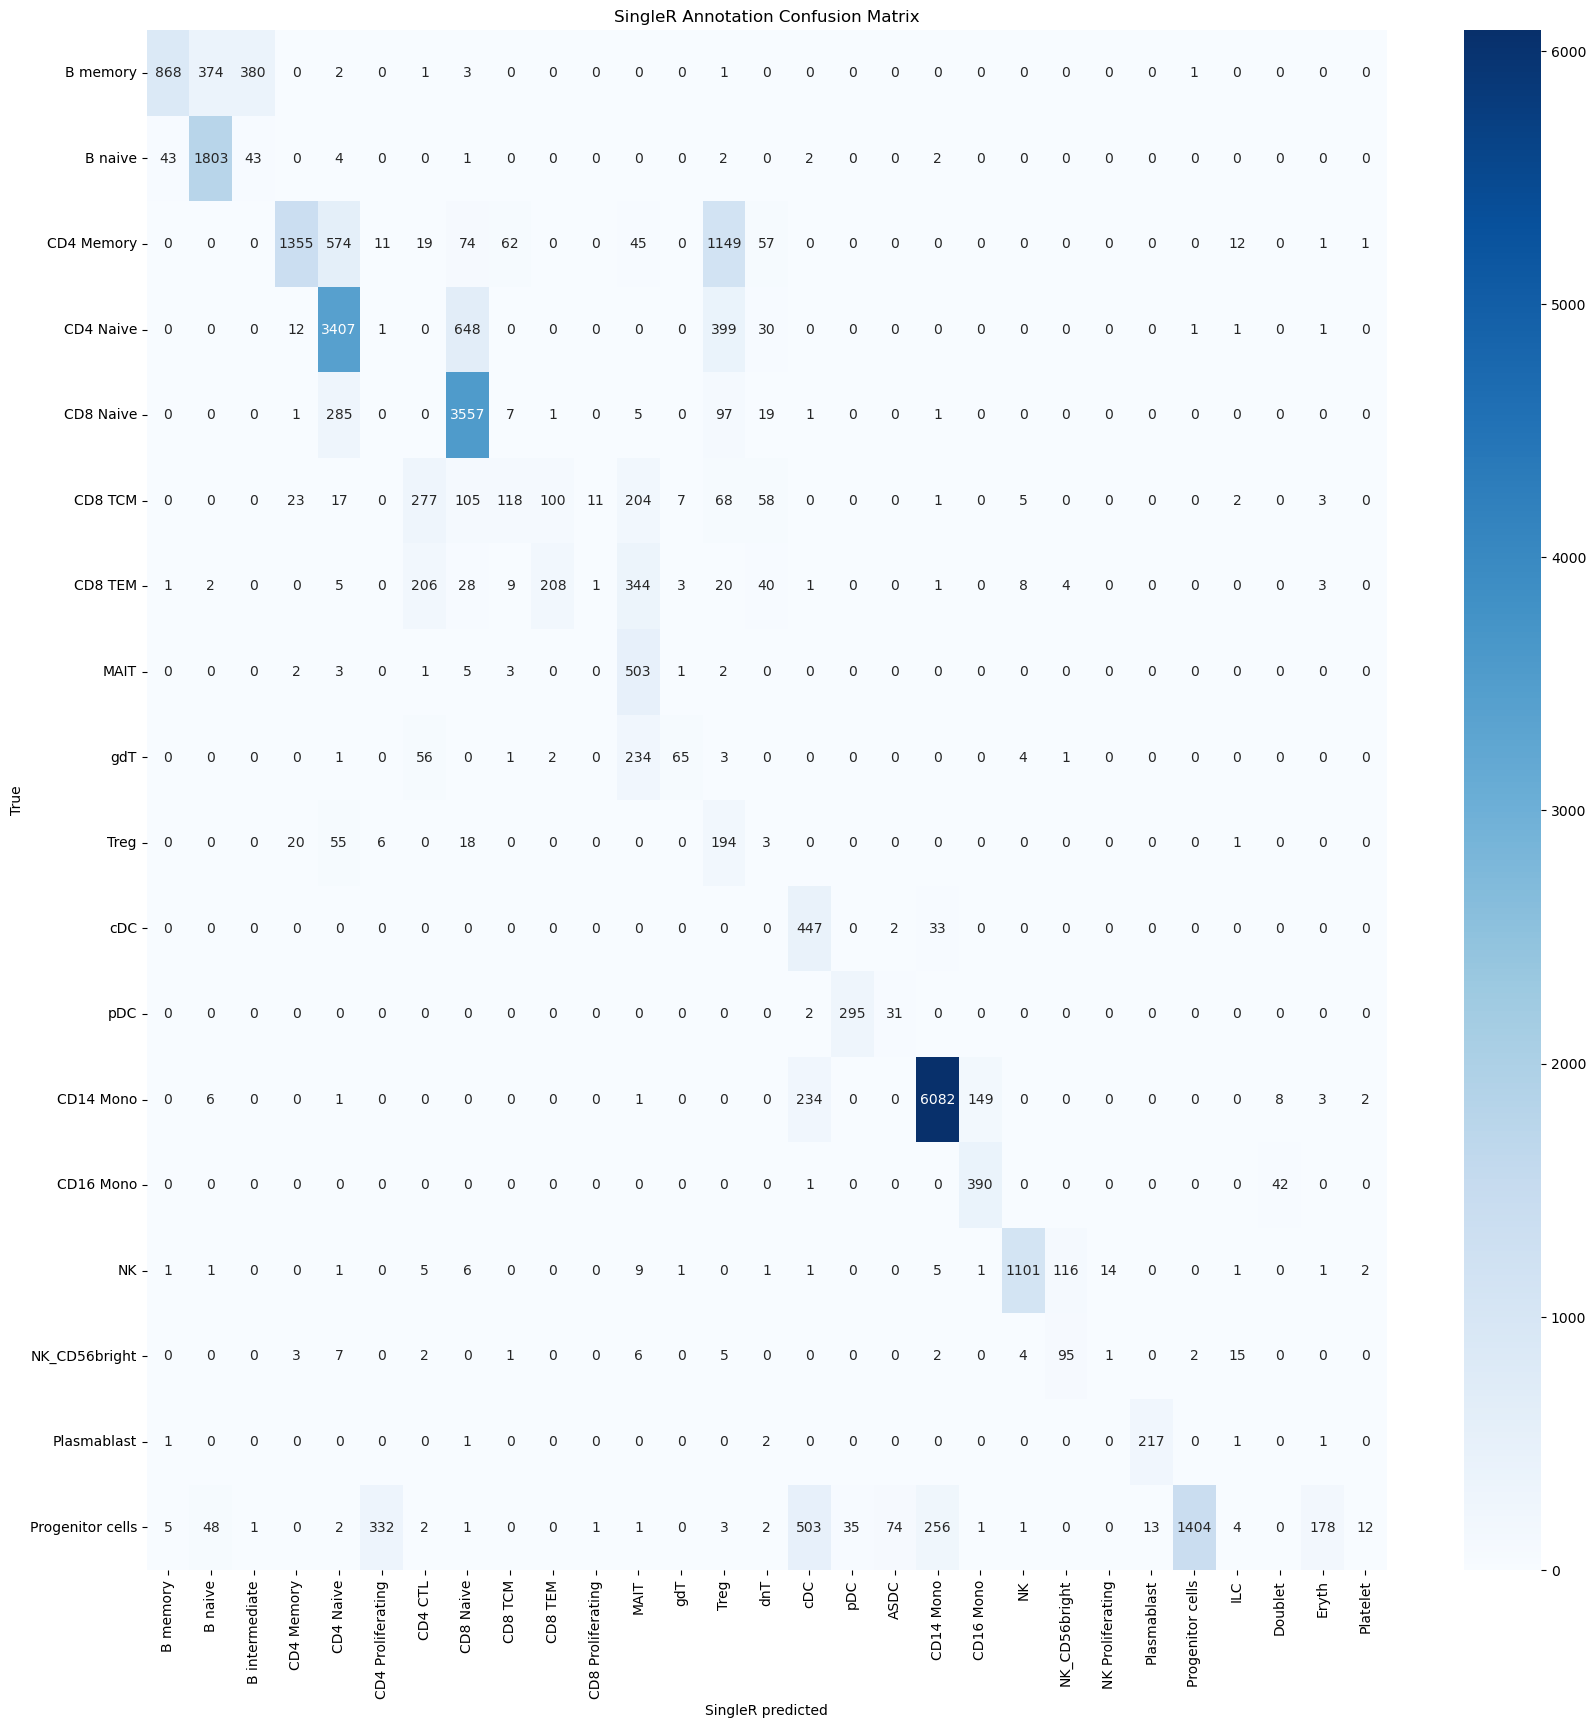

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

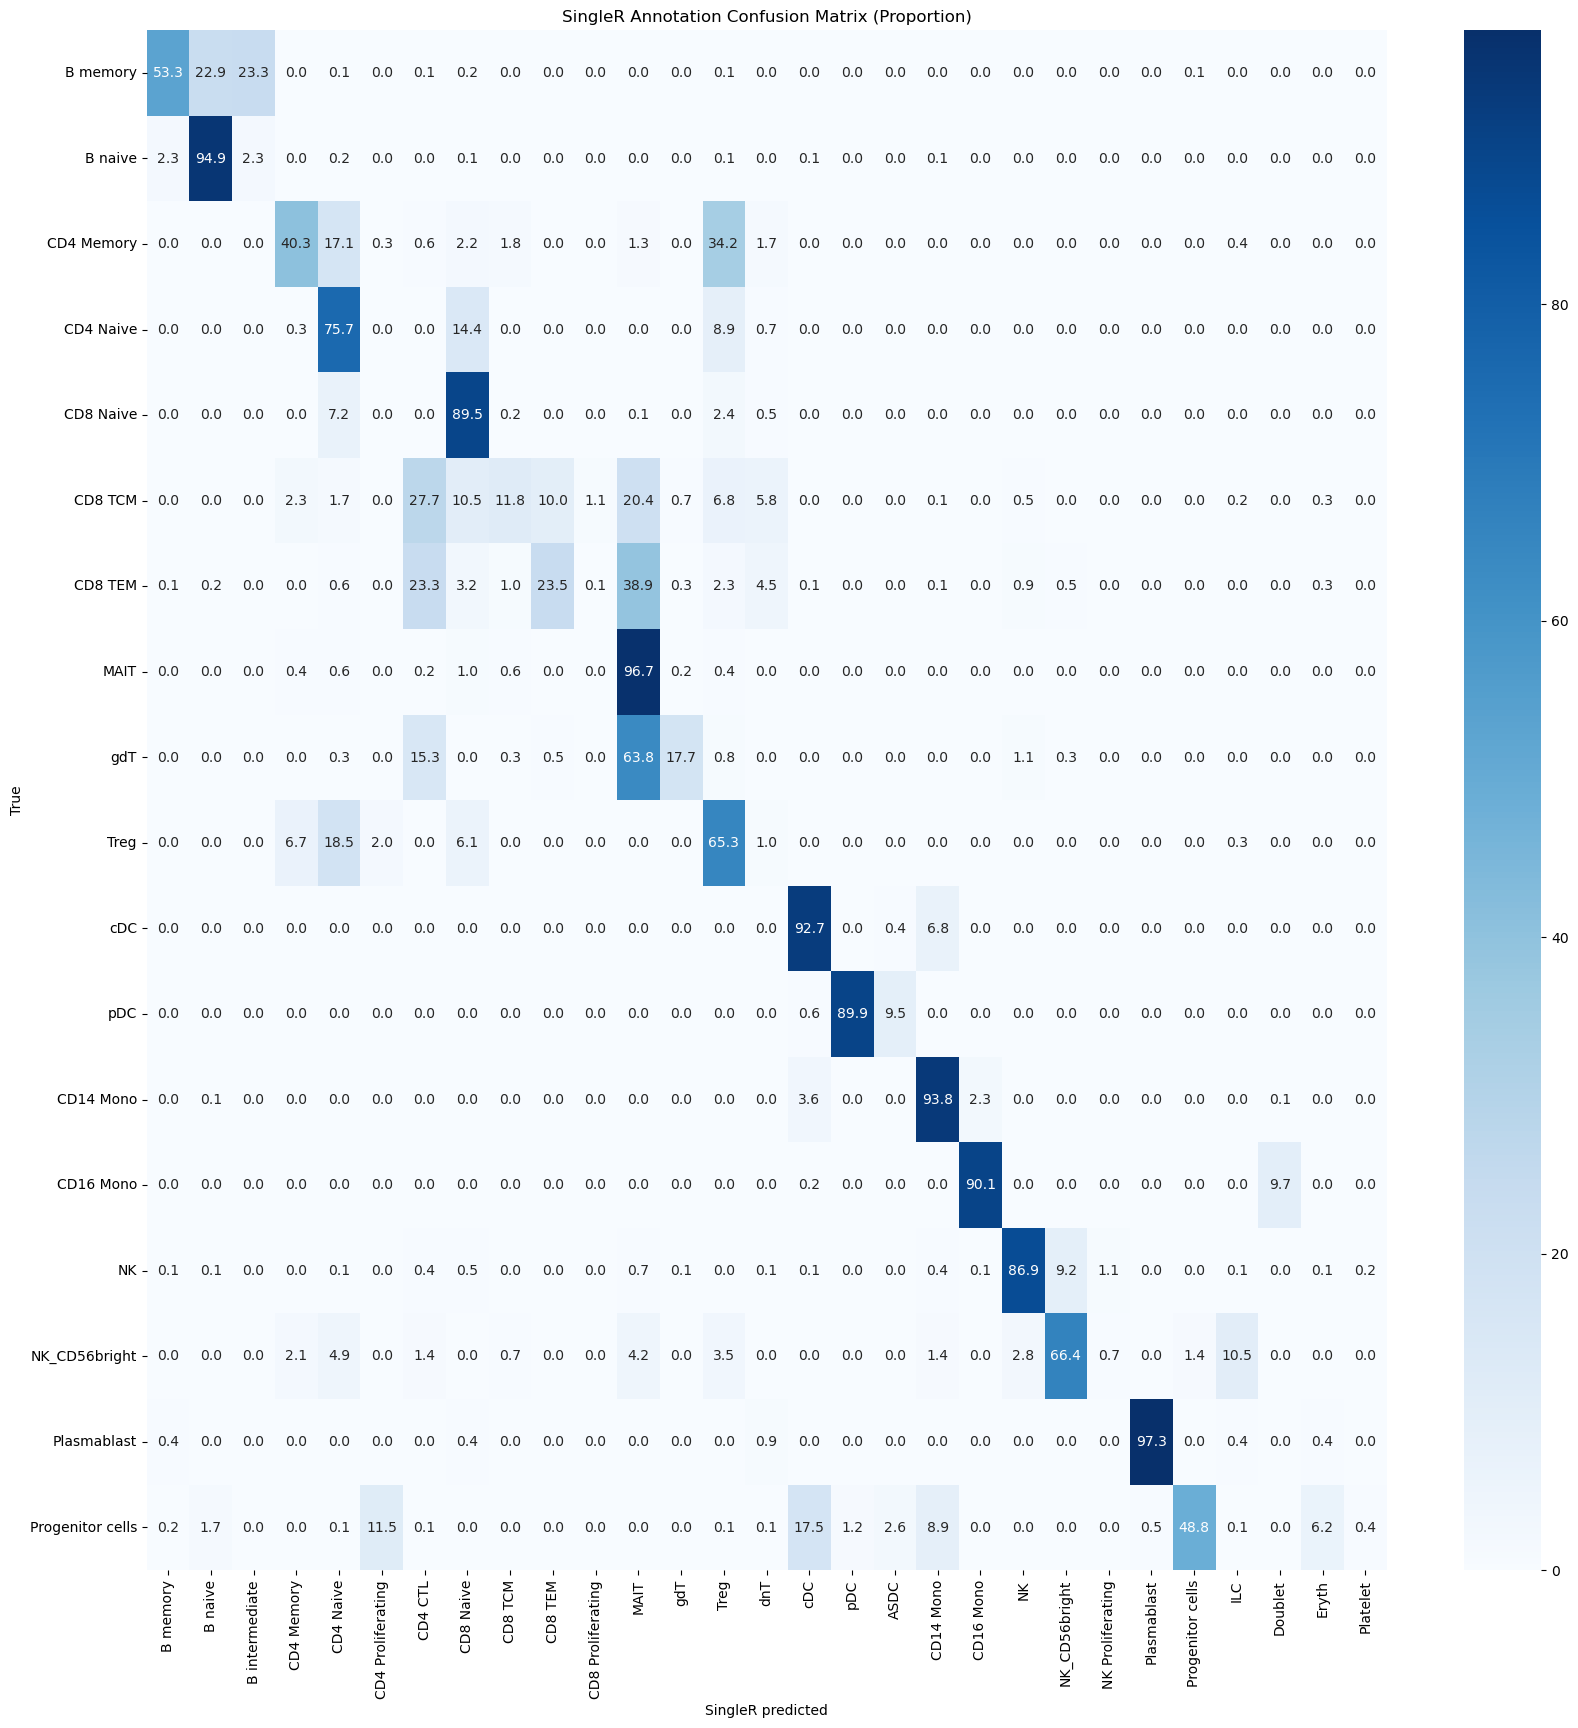

In [20]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(20, 20))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.720820292123109
micro Precision: 0.720820292123109
micro F1 Score: 0.720820292123109
macro Precision: 0.45394892800720044
macro F1 Score: 0.3973395774892403
weighted Precision: 0.8490884175393655
weighted F1 Score: 0.7434916557173943
